In [21]:
#импортирую нужные библиотеки

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
#импортирую датасет1

user_data=pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv', sep=',')

In [23]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [24]:
#импортирую датасет2

logs=pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [25]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [26]:
#Сколько уникальных значений принимает переменная platform?

logs.platform.nunique()

3

In [27]:
#Какой клиент совершил больше всего успешных операций?

logs.groupby('client') \
    .agg({'success': 'sum'}) \
    .query('success == success.max()') \
    .sort_values('client') \
    .index \
    .tolist()
#таких клиентов несколько

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [28]:
#С какой платформы было совершено наибольшее количество успешных операций?

logs.query('success==True') \
    .groupby('platform').agg({'platform': 'count'}).idxmax()

platform    phone
dtype: object

In [29]:
#Какую платформу предпочитают премиальные клиенты?
#Для этого соединяю две таблицы

result=user_data.merge(logs, on='client')

In [30]:
result

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [31]:
result.query('premium==True') \
    .groupby('platform').agg({'platform': 'count'}).idxmax()

platform    phone
dtype: object

/Users/olgakalinina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/olgakalinina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

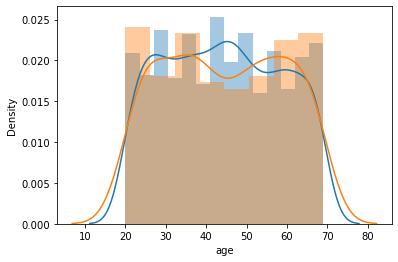

In [32]:
#Визуализирую распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

sns.distplot(user_data.query('premium == False').age)
sns.distplot(user_data.query('premium == True').age)

<AxesSubplot:xlabel='success', ylabel='count'>

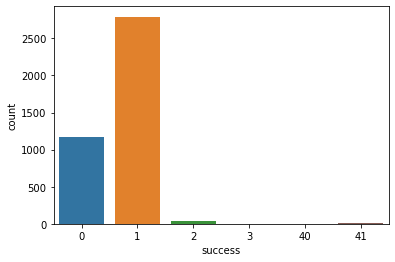

In [33]:
#строю график распределения числа успешных операций

sns.countplot(x='success',
              data=logs.groupby('client').agg({'success': 'sum'}))

/Users/olgakalinina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

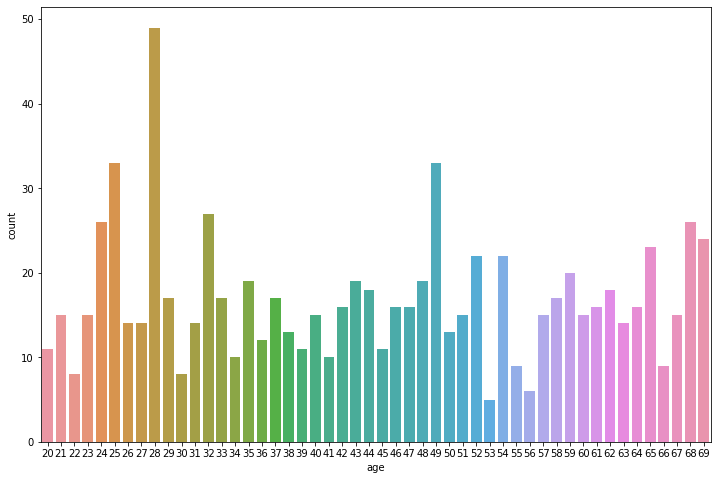

In [34]:
#Визуализирую число успешных операций, сделанных на платформе computer, в зависимости от возраста

plt.figure(figsize=(12, 8))
sns.countplot('age', data=result.query('success==True').query("platform == 'computer'"))